<a href="https://colab.research.google.com/github/mdssumin/SmartFactory_with_MDSTech_2nd/blob/main/Personal_Project%20/Sumin_Lee/mask_kaggle_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/rohitgadhwar/face-mask-detection-yolov5/notebook

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jetsoneddy","key":"8646baabc3c28a96e0a9dd0154106805"}'}

In [2]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission WarningÏù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÎèÑÎ°ù Ìï¥Ï§çÎãàÎã§.
!chmod 600 ~/.kaggle/kaggle.json
# ÎÇ¥Í∞Ä Ï∞∏Í∞ÄÌïú ÎåÄÌöå Î¶¨Ïä§Ìä∏ ÌôïÏù∏
!kaggle competitions list

ref                                                                                           deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/asl-fingerspelling                                        2023-08-24 23:59:00  Research          $200,000        826           False  
https://www.kaggle.com/competitions/icr-identify-age-related-conditions                       2023-08-10 23:59:00  Featured           $60,000       5950           False  
https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries                      2023-10-11 23:59:00  Featured           $60,000        309           False  
https://www.kaggle.com/competitions/bengaliai-speech                                          2023-10-17 23:59:00  Research           $53,000    

In [5]:
!kaggle datasets download -d andrewmvd/face-mask-detection

100% 397M/398M [00:19<00:00, 23.2MB/s]
100% 398M/398M [00:19<00:00, 21.7MB/s]


In [8]:
%cd /content
!mkdir dataset_mask_detection
%cd dataset_mask_detection
!unzip ../face-mask-detection.zip

/content
/content/dataset_mask_detection
Archive:  ../face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  inflating: annotations/maksssksks

dataset_mask_detectionÌè¥Îçî ÎßåÎì§Ïñ¥ÏÑú annotations Ìè¥ÎçîÏôÄ images Ìè¥ÎçîÎ•º Ìï¥Îãπ Ìè¥Îçî Î°ú Ïù¥Îèô

In [21]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -qr requirements.txt

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import os
import glob
from datetime import datetime
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
input_data = '/content/dataset_mask_detection/'
output_data = '/content/yolov5/data'

In [13]:
annotations_path = "/content/dataset_mask_detection/annotations"
images_path = "/content/dataset_mask_detection/images"

In [14]:
dataset = {
            "file":[],
            "name":[],
            "width":[],
            "height":[],
            "xmin":[],
            "ymin":[],
            "xmax":[],
            "ymax":[],
           }

for anno in glob.glob(annotations_path+"/*.xml"):
    tree = ET.parse(anno)

    for elem in tree.iter():
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag:
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))

        if 'object' in elem.tag:
            for attr in list(elem):

                if 'name' in attr.tag:
                    name = attr.text
                    dataset['name']+=[name]
                    dataset['width']+=[width]
                    dataset['height']+=[height]
                    dataset['file']+=[anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            dataset['xmin']+=[xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            dataset['ymin']+=[ymin]
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            dataset['xmax']+=[xmax]
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            dataset['ymax']+=[ymax]

In [15]:
df=pd.DataFrame(dataset)
df.head()

file       name  width  height  xmin  ymin  xmax  ymax
0  maksssksksss807  with_mask    400     267    19    47    35    61
1  maksssksksss807  with_mask    400     267    58    42    73    57
2  maksssksksss807  with_mask    400     267    85    63    93    71
3  maksssksksss807  with_mask    400     267   108    56   125    69
4  maksssksksss807  with_mask    400     267   165    28   184    49

In [16]:
name_dict = {
    'with_mask': 0,
    'mask_weared_incorrect': 1,
    'without_mask': 2
}

df['class'] = df['name'].map(name_dict)

In [17]:
np.sort(df.name.unique())

array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype=object)

In [18]:
fileNames = [*os.listdir("/content/dataset_mask_detection/images")]
print('There are {} images in the dataset'.format(len(fileNames)))

There are 853 images in the dataset


In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(fileNames, test_size=0.1, random_state=22)
test, val = train_test_split(test, test_size=0.7, random_state=22)
print("Length of Train =",len(train))
print("="*30)
print("Length of Valid =",len(val))
print("="*30)
print("Length of test =", len(test))

Length of Train = 767
Length of Valid = 61
Length of test = 25


In [23]:
# create separate train test and validation dir inside yolo/data/
# os.chdir('/content/kaggle_workspace/')
os.mkdir('/content/yolov5/data/train')
os.mkdir('/content/yolov5/data/val')
os.mkdir('/content/yolov5/data/test')
os.mkdir('/content/yolov5/data/train/images')
os.mkdir('/content/yolov5/data/train/labels')
os.mkdir('/content/yolov5/data/test/images')
os.mkdir('/content/yolov5/data/test/labels')
os.mkdir('/content/yolov5/data/val/images')
os.mkdir('/content/yolov5/data/val/labels')

In [24]:
from PIL import Image

def copyImages(imageList, folder_Name):
    for image in imageList:
        img = Image.open(input_data+"/images/"+image)
        img1 = img.resize((640, 480))
        _ = img1.save("/content/yolov5/data/"+folder_Name+"/images/"+image)

copyImages(train, "train")
copyImages(val, "val")
copyImages(test, "test")

In [25]:
df.head()

file       name  width  height  xmin  ymin  xmax  ymax  class
0  maksssksksss807  with_mask    400     267    19    47    35    61      0
1  maksssksksss807  with_mask    400     267    58    42    73    57      0
2  maksssksksss807  with_mask    400     267    85    63    93    71      0
3  maksssksksss807  with_mask    400     267   108    56   125    69      0
4  maksssksksss807  with_mask    400     267   165    28   184    49      0

In [26]:
df['xmax'] = (640/df['width'])*df['xmax']
df['ymax'] = (480/df['height'])*df['ymax']
df['xmin'] = (640/df['width'])*df['xmin']
df['ymin'] = (480/df['height'])*df['ymin']

In [27]:
df[['xmax', 'ymax', 'xmin', 'ymin']] = df[['xmax', 'ymax', 'xmin', 'ymin']].astype('int64')

In [28]:
df['x_center'] = (df['xmax']+df['xmin'])/(2*640)
df['y_center'] = (df['ymax']+df['ymin'])/(2*480)
df['box_height'] = (df['xmax']-df['xmin'])/(640)
df['box_width'] = (df['ymax']-df['ymin'])/(480)

In [29]:
df.head()

file       name  width  height  xmin  ymin  xmax  ymax  class  \
0  maksssksksss807  with_mask    400     267    30    84    56   109      0   
1  maksssksksss807  with_mask    400     267    92    75   116   102      0   
2  maksssksksss807  with_mask    400     267   136   113   148   127      0   
3  maksssksksss807  with_mask    400     267   172   100   200   124      0   
4  maksssksksss807  with_mask    400     267   264    50   294    88      0   

   x_center  y_center  box_height  box_width  
0  0.067187  0.201042    0.040625   0.052083  
1  0.162500  0.184375    0.037500   0.056250  
2  0.221875  0.250000    0.018750   0.029167  
3  0.290625  0.233333    0.043750   0.050000  
4  0.435937  0.143750    0.046875   0.079167

In [30]:
df = df.astype('string')

In [31]:
def create_labels(image_list, data_name):
    fileNames = [x.split(".")[0] for x in image_list]

    for name in fileNames:
        data = df[df.file==name]
        box_list = []

        for index in range(len(data)):
            row = data.iloc[index]
            box_list.append(row['class']+" "+row["x_center"]+" "+row["y_center"]\
                        +" "+row["box_height"]+" "+row["box_width"])

        text = "\n".join(box_list)
        with open("/content/yolov5/data/"+data_name+"/labels/"+name+".txt", "w") as file:
            file.write(text)


create_labels(train, "train")
create_labels(val, "val")
create_labels(test, "test")

In [32]:
 # go to YOLO directory
%cd /content/yolov5

/content/yolov5


In [45]:
# to display images
from IPython.display import Image, clear_output
import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 üöÄ v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ‚úÖ (4 CPUs, 25.5 GB RAM, 26.1/166.8 GB disk)


In [35]:
# configure .yaml file to guide the model for training
yaml_text = """train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']"""

with open("data/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat data/data.yaml

train: data/train/images
val: data/train/images

nc: 3
names: ['with_mask', 'mask_weared_incorrect', 'without_mask']

In [36]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [37]:
%%writetemplate models/custom_yolov5s.yaml

# parameters
nc: 3  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
    - [10,13, 16,30, 33,23]  # P3/8
    - [30,61, 62,45, 59,119]  # P4/16
    - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
    [[-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 6], 1, Concat, [1]],  # cat backbone P4
    [-1, 3, BottleneckCSP, [512, False]],  # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 'nearest']],
    [[-1, 4], 1, Concat, [1]],  # cat backbone P3
    [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],  # cat head P4
    [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],  # cat head P5
    [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
    ]

In [38]:
# train yolov5s on custom data for 100 epochs
# time its performance
# we are going to using pre-trained weights from yolov5.pt model

start = datetime.now()
!python train.py --img 640 --batch 32 --epochs 50 --data data/data.yaml --cfg models/custom_yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache
end = datetime.now()

WARNING ‚ö†Ô∏è 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ‚ö†Ô∏è 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

train: weights=yolov5s.pt, cfg=models/custom_yolov5s.yaml, data=data/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, cos_lr=Fals

In [39]:
print("Runtime =",end-start)

Runtime = 0:14:09.971152


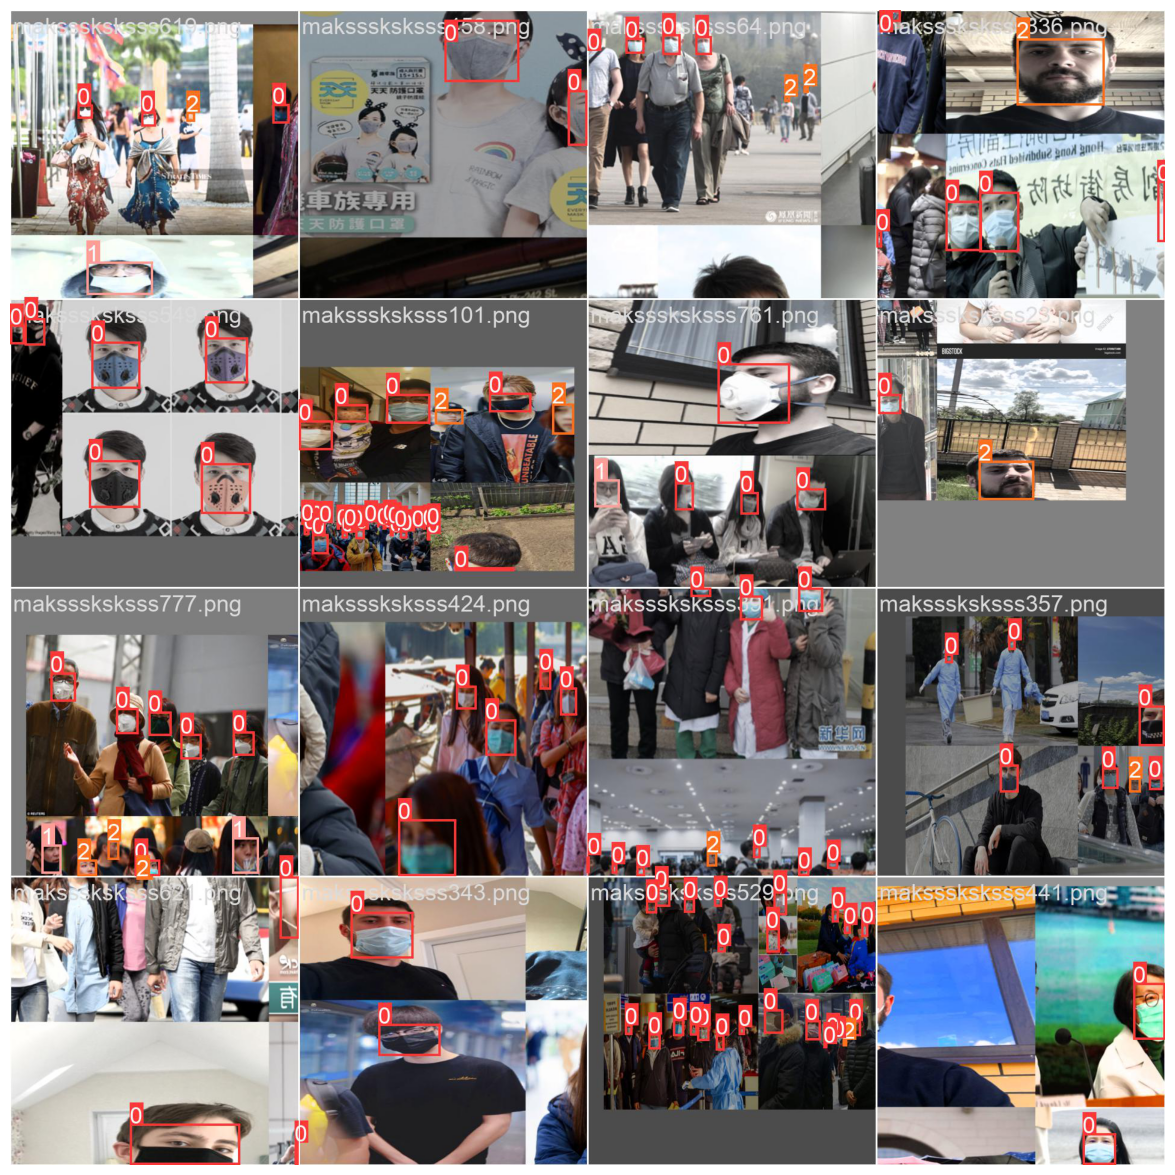

In [40]:
# lets visualize the training results
img = plt.imread('runs/train/yolov5s_results/train_batch0.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
# Ïù¥ÎØ∏ÏßÄ

from IPython.display import Image
import os

!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.7 --source /content/dataset_mask_detection/images/maksssksksss15.png


WARNING ‚ö†Ô∏è 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ‚ö†Ô∏è 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], source=/content/dataset_mask_detection/images/maksssksksss15.png, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thicknes

In [43]:
# ÏòÅÏÉÅ Ï∂îÎ°†

from IPython.display import YouTubeVideo, display
import os

!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.7 --source /content/mask_test_video.mp4


Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
video 1/1 (3282/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 6.6ms
video 1/1 (3283/8279) /content/mask_test_video.mp4: 256x416 4 with_masks, 6.9ms
video 1/1 (3284/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 6.6ms
video 1/1 (3285/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 6.1ms
video 1/1 (3286/8279) /content/mask_test_video.mp4: 256x416 6 with_masks, 6.5ms
video 1/1 (3287/8279) /content/mask_test_video.mp4: 256x416 6 with_masks, 6.0ms
video 1/1 (3288/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 6.6ms
video 1/1 (3289/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 1 without_mask, 6.1ms
video 1/1 (3290/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 1 without_mask, 6.8ms
video 1/1 (3291/8279) /content/mask_test_video.mp4: 256x416 5 with_masks, 1 without_mask, 8.2ms
video 1/1 (3292/8279) /content/mask_test_video.mp4: 256x416 5 with_m

In [44]:
from google.colab import files
files.download('/content/yolov5/runs/detect/exp3/mask_test_video.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>